## Projekt - Chemisches Rauschen 

Chemische Reaktionen finden zwischen einzelnen Teilchen statt. Die Anzahl verschiedener
Teilchen in einem System ist hierbei aus der Menge der natuerlichen Zahlen. Wird ein Teilchen
umgewandelt verringert sich die Anzahl der entsprechenden Teilchensorte und die Anzahl
der Teilchen des Reaktionsproduktes erhoeht sich. Die Zeitpunkte an denen diese Uebergaenge
stattfinden sind zufaellig. Nichtsdestotrotz werden chemische Reaktionen oft sehr genau durch
Differentialgleichungen fuer die Konzentrationen der Stoffe beschrieben. In diesem Projekt
sollen der Gillespie Algorithmus zur stochastischen Simulation von chemischen Reaktionen
erarbeitet, und einige der Simulationen in den urspruenglichen Artikeln [1, 2] nachvollzogen
werden. 

Belesen Sie sich zunaechst zu den Themen *chemische Kinetik*, *Gillespie Algorithmus*,
*Exponential-* und *Gammaverteilung* und schauen Sie sich die Artikel [1, 2] an!

#### Beispiel 2 : Brusselator

Als naechstes soll eine Reaktion mit dynamischer Instabilitaet untersucht werden, das sogenannte
Brusselatormodell. Dieses wird durch die folgenden Reaktionen beschrieben :

$$
\begin{eqnarray}
R_0 &:& X_0 \to X_0 + Y_0 \\
R_1 &:& X_1 \to X_1 + Y_1 + Z_0 \\
R_2 &:& 2Y_0 + Y_1 \to 3Y_0\\
R_3 &:& Y_0 \to Z_1
\end{eqnarray}
$$

Teilchen der Sorte $X_i$ bilden die Resourcen der chemischen Reaktion. Da die Resourcen
waehrend der Reaktion konstant gehalten werden sollen, haben wir die rechten Seiten der
Reaktionen $R_0$ und $R_1$ einfach ergaenzt. In Reaktion $R_0$ bedeutet dies z.B., dass jedesmal
wenn ein Teilchen $X_0$ in $Y_0$ umgewandelt wird, ein weiteres Teilchen $X_0$ dem System hinzugegeben
wird. Die Konzentrationen der Endprodukte $Z_i$ sind fuer die Uebergangsraten und die Konzentrationen der uns interessierenden Zwischenprodukte $Y_i$ nicht relevant.

- Schreiben Sie zunaechst mit Hilfe der chemischen Reaktionsraten $k_i$ die Differentialgleichungen
fuer die Konzentrationen $y_0$ und $y_1$ der Teilchen $Y_0$ und $Y_1$ auf. 
- Druecken Sie nun die Konzentration durch Teilchenzahl und Volumen aus, und bestimmen Sie die Uebergangsraten
$r_i\left(\vec{N} ,\vec{k}, V \right)$ im System. Im Originalpapier von Gillespie [2] werden die Systemparameter
$\gamma_0 = k_0N_{X_0} = 5000s^{−1}$, $\gamma_1 = k_1N_{X_1}/V = 50s^{−1}$, $\gamma_2 = k_2/V^2 = 5 × 10^{−5}s^{−1}$ und $\gamma_3 = k_3 = 5s^{−1}$ verwendet, wodurch die Uebergangsraten auch als $r_i\left(\vec{N} ,\vec{\gamma}\right)$ geschrieben werden koennen.
- Simulieren Sie das stochastische System von chemischen Reaktionen fuer $N_{Y_0}(t = 0) = 1000$
und $N_{Y_1}(t = 0) = 2000$ fuer $2×10^6$ Reaktionsuebergaenge und plotten Sie $N_{Y_1}$ gegen $N_{Y_2}$ , sowie
jeweils $N_{Y_1}(t_n)$ und $N_{Y_2}(t_n)$ nach den Reaktionszeitpunkten $t_n$ fuer $0s < t_n < 14s$.

In [1]:
import numpy as np
%matplotlib inline
from pylab import *

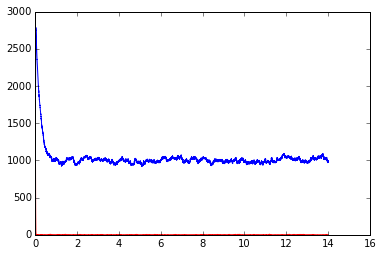

In [3]:
nX00 = nY00 = 1000
nX10 = nY10 = 2000
nZ00 = 0
nZ10 = 0
gamma0 = 5000
gamma1 = 50
gamma2 = 5 * 10**(-5)
gamma3 = 5
gamma = np.array([gamma0, gamma1, gamma2, gamma3])
V = 1
brus_n0 = np.array([nX00, nX10, nY00, nY10, nZ00, nZ10])

brus_nu0 = np.array([0, 0, +1, +0, 0, 0])
brus_nu1 = np.array([0, 0, +0, +1, 0, 0])
brus_nu2 = np.array([0, 0, +1, -1, 0, 0])
brus_nu3 = np.array([0, 0, -1, +0, 0, 0])
brus_nu = [brus_nu0, brus_nu1, brus_nu2, brus_nu3]
brus_t_max = 14

def brus_calculate_r(brus_n, gamma, V):
    brus_r0 = gamma[0] 
    brus_r1 = gamma[1] 
    brus_r2 = gamma[2]  * (brus_n[2]-1)/2 * brus_n[2] * brus_n[3]
    brus_r3 = gamma[3] * V * brus_n[2]
    brus_r = [brus_r0, brus_r1, brus_r2, brus_r3]
    return brus_r

def reaction(V, brus_n0, brus_nu, gamma, brus_t_max):
    brus_t = 0
    brus_n = brus_n0

    while brus_t < brus_t_max:
        brus_r = brus_calculate_r(brus_n, gamma, V)
        brus_r_tot = sum(brus_r)
       
        brus_dt = np.random.exponential(scale=1/brus_r_tot)
        brus_t = brus_t + brus_dt
        brus_i = np.random.rand()
        brus_i = np.argmax(brus_i<np.cumsum(brus_r)/brus_r_tot)
        brus_n = brus_n + brus_nu[brus_i]
        yield brus_t, brus_n
        
brus_t, brus_n = zip(*list(reaction(V, brus_n0, brus_nu, gamma, brus_t_max)))
brus_n = np.array(brus_n).T
brus_t = np.array(brus_t)
plot(brus_t, brus_n[2] , label="Simulation $y_0$")
plot(brus_t, brus_n[3], 'r', label="Simulation $y_1$")